In [1]:
# Imports

import os

import tensorflow as tf
import keras_preprocessing

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

W0609 19:27:44.057099 14176 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
# Get craete a pre trained model with previous weights

local_weights_file = 'aslAtoZ.h5'

pre_trained_model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [3]:
# Testing images using Keras Pre Processor

import numpy as np
#from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()
#for fn in uploaded.keys():

# predicting images
path = 'E_test.jpg'
img = image.load_img(path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = pre_trained_model.predict(images, batch_size=10)
print(path)
#print(classes)
prediction = classes.tolist()
print(prediction)
pos = prediction.index(max(prediction))

Using TensorFlow backend.


E_test.jpg
[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [4]:
# Working with images 

import cv2
from PIL import Image

In [ ]:
# Taking image input using OpenCV

testimg = cv2.imread('E_test.jpg')
im = Image.fromarray(testimg, 'RGB')
# Resizing into 200x200
im = im.resize((200,200))
img_array = np.array(im)
img_array = np.expand_dims(img_array, axis=0)
prediction = pre_trained_model.predict(img_array)

print(type(prediction))
prediction = classes.tolist()
print(type(prediction))

predAns = chr(prediction[0].index(max(prediction[0])) + 65)
print(predAns)

<class 'numpy.ndarray'>
<class 'list'>
E


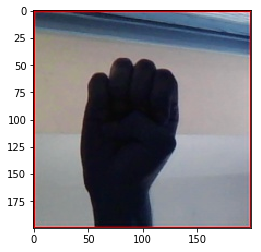

In [ ]:
# Working on the test image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(testimg,"This is E",(50,50),font,0.5,(255,0,0),2)

cv2.imshow("testImg", testimg)

plt.imshow(im)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()